In [82]:
import numpy as np
import scipy as spy
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import loadData as ld
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
from plotly import __version__
print('plotly version: ', __version__) 
from IPython.display import HTML
import matplotlib.cm as cm
from matplotlib.colors import Normalize
%matplotlib inline
axl_font_sz = 16;
fwidth = 4.0; fheight = fwidth/1.2;
nframe = 1;

plotly version:  2.7.0


In [83]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


In [84]:
master_dir_90 = "/home/ahsan/4rows_angle_0/"
inpara_90 = ld.readInput(master_dir_90+"input/LESinputs.txt");
au_90 = ld.loadBin(master_dir_90+"output/au.bin", inpara_90['Nz']);
av_90 = ld.loadBin(master_dir_90+"output/av.bin", inpara_90['Nz']);
auu_90 = ld.loadBin(master_dir_90+"output/u2.bin", inpara_90['Nz']);
avv_90 = ld.loadBin(master_dir_90+"output/v2.bin", inpara_90['Nz']);
aww_90 = ld.loadBin(master_dir_90+"output/w2.bin", inpara_90['Nz']);
auw_90 = ld.loadBin(master_dir_90+"output/auw.bin", inpara_90['Nz']);
atxz_90 = ld.loadBin(master_dir_90+"output/atxz.bin", inpara_90['Nz']);
avw_90 = ld.loadBin(master_dir_90+"output/avw.bin", inpara_90['Nz']);
atyz_90 = ld.loadBin(master_dir_90+"output/atyz.bin", inpara_90['Nz']);
ustar_90_planeavg = ((auw_90+atxz_90)**2 + (avw_90+atyz_90)**2)**(0.25);

In [85]:
master_dir_45 = "/home/ahsan/4rows_angle_45/"
inpara_45 = ld.readInput(master_dir_45+"input/LESinputs.txt");
au_45 = ld.loadBin(master_dir_45+"output/au.bin", inpara_45['Nz']);
av_45 = ld.loadBin(master_dir_45+"output/av.bin", inpara_45['Nz']);
auu_45 = ld.loadBin(master_dir_45+"output/u2.bin", inpara_45['Nz']);
avv_45 = ld.loadBin(master_dir_45+"output/v2.bin", inpara_45['Nz']);
aww_45 = ld.loadBin(master_dir_45+"output/w2.bin", inpara_45['Nz']);
auw_45 = ld.loadBin(master_dir_45+"output/auw.bin", inpara_45['Nz']);
atxz_45 = ld.loadBin(master_dir_45+"output/atxz.bin", inpara_45['Nz']);
avw_45 = ld.loadBin(master_dir_45+"output/avw.bin", inpara_45['Nz']);
atyz_45 = ld.loadBin(master_dir_45+"output/atyz.bin", inpara_45['Nz']);
ustar_45_planeavg = ((auw_45+atxz_45)**2 + (avw_45+atyz_45)**2)**(0.25);

In [86]:
master_dir_0 = "/home/ahsan/4rows_angle_90/"
inpara_0 = ld.readInput(master_dir_0+"input/LESinputs.txt");
au_0 = ld.loadBin(master_dir_0+"output/au.bin", inpara_0['Nz']);
av_0 = ld.loadBin(master_dir_0+"output/av.bin", inpara_0['Nz']);
auu_0 = ld.loadBin(master_dir_0+"output/u2.bin", inpara_0['Nz']);
avv_0 = ld.loadBin(master_dir_0+"output/v2.bin", inpara_0['Nz']);
aww_0 = ld.loadBin(master_dir_0+"output/w2.bin", inpara_0['Nz']);
auw_0 = ld.loadBin(master_dir_0+"output/auw.bin", inpara_0['Nz']);
atxz_0 = ld.loadBin(master_dir_0+"output/atxz.bin", inpara_0['Nz']);
avw_0 = ld.loadBin(master_dir_0+"output/avw.bin", inpara_0['Nz']);
atyz_0 = ld.loadBin(master_dir_0+"output/atyz.bin", inpara_0['Nz']);
ustar_0_planeavg = ((auw_0+atxz_0)**2 + (avw_0+atyz_0)**2)**(0.25);

In [87]:
time_steps_run = au_90.shape[0]*inpara_0['p_count'];
print("Total number of time steps simulation ran for: ", time_steps_run);
physical_time_run = time_steps_run * inpara_0['dt'];
print("Physical time period of simulation(min):{0:2.2f}".format(physical_time_run/60.0));
# time steps corresponding to 5 minutes
set_min_steps = int(5 * 60 / inpara_0['dt']/inpara_0['p_count']);
z_u = np.linspace(0.5*inpara_0['dz'], inpara_0['l_z'], inpara_0['Nz']);
z_w = np.linspace(0.0*inpara_0['dz'], inpara_0['l_z'], inpara_0['Nz']);

stavg_au_90 = np.mean(au_90[-set_min_steps:-1,:], axis=0);
stavg_av_90 = np.mean(av_90[-set_min_steps:-1,:], axis=0);
stavg_auu_90 = np.mean(auu_90[-set_min_steps:-1,:], axis=0);
stavg_avv_90 = np.mean(avv_90[-set_min_steps:-1,:], axis=0);
stavg_aww_90 = np.mean(aww_90[-set_min_steps:-1,:], axis=0);
stavg_auw_90 = np.mean(auw_90[-set_min_steps:-1,:], axis=0);
stavg_atxz_90 = np.mean(atxz_90[-set_min_steps:-1,:], axis=0);
stavg_avw_90 = np.mean(avw_90[-set_min_steps:-1,:], axis=0);
stavg_atyz_90 = np.mean(atyz_90[-set_min_steps:-1,:], axis=0);
ustar_90 = ((stavg_auw_90+stavg_atxz_90)**2 + (stavg_avw_90+stavg_atyz_90)**2)**(0.25);
ustar_90_max = ustar_90.max()

stavg_au_45 = np.mean(au_45[-set_min_steps:-1,:], axis=0);
stavg_av_45 = np.mean(av_45[-set_min_steps:-1,:], axis=0);
stavg_auu_45 = np.mean(auu_45[-set_min_steps:-1,:], axis=0);
stavg_avv_45 = np.mean(avv_45[-set_min_steps:-1,:], axis=0);
stavg_aww_45 = np.mean(aww_45[-set_min_steps:-1,:], axis=0);
stavg_auw_45 = np.mean(auw_45[-set_min_steps:-1,:], axis=0);
stavg_atxz_45 = np.mean(atxz_45[-set_min_steps:-1,:], axis=0);
stavg_avw_45 = np.mean(avw_45[-set_min_steps:-1,:], axis=0);
stavg_atyz_45 = np.mean(atyz_45[-set_min_steps:-1,:], axis=0);
ustar_45 = ((stavg_auw_45+stavg_atxz_45)**2 + (stavg_avw_45+stavg_atyz_45)**2)**(0.25);
ustar_45_max = ustar_45.max()

stavg_au_0 = np.mean(au_0[-set_min_steps:-1,:], axis=0);
stavg_av_0 = np.mean(av_0[-set_min_steps:-1,:], axis=0);
stavg_auu_0 = np.mean(auu_0[-set_min_steps:-1,:], axis=0);
stavg_avv_0 = np.mean(avv_0[-set_min_steps:-1,:], axis=0);
stavg_aww_0 = np.mean(aww_0[-set_min_steps:-1,:], axis=0);
stavg_auw_0 = np.mean(auw_0[-set_min_steps:-1,:], axis=0);
stavg_atxz_0 = np.mean(atxz_0[-set_min_steps:-1,:], axis=0);
stavg_avw_0 = np.mean(avw_0[-set_min_steps:-1,:], axis=0);
stavg_atyz_0 = np.mean(atyz_0[-set_min_steps:-1,:], axis=0);
ustar_0 = ((stavg_auw_0+stavg_atxz_0)**2 + (stavg_avw_0+stavg_atyz_0)**2)**(0.25);
ustar_0_max = ustar_0.max()

MSpeed_90 = np.sqrt(stavg_au_90**2 + stavg_av_90**2);
MSpeed_45 = np.sqrt(stavg_au_45**2 + stavg_av_45**2);
MSpeed_0 = np.sqrt(stavg_au_0**2 + stavg_av_0**2);
print(inpara_0['h_canopy']);
print(inpara_0['h_canopy']/inpara_0['dz'])
z_indx_ctop = int(np.floor(inpara_0['h_canopy']/inpara_0['dz']));
#print('z_indx_ctop: ', z_indx_ctop);

Total number of time steps simulation ran for:  1150000
Physical time period of simulation(min):19.17
2.16
11.875


In [88]:
#load LAD profile
fname = master_dir_90+"/input/PlantDensity.ini";
ladfield = ld.loadField(fname, inpara_90['Nx'], inpara_90['Ny'], inpara_90['Nz']);
# applied force 90 degree with vine row
fname= master_dir_90+"output/u_frame/u_frame{0:04d}.bin".format(1);
uu_90 = ld.loadField(fname, inpara_90['Nx'], inpara_90['Ny'], inpara_90['Nz'])*inpara_90['u_star'];
fname= master_dir_90+"output/v_frame/v_frame{0:04d}.bin".format(1);
vv_90 = ld.loadField(fname, inpara_90['Nx'], inpara_90['Ny'], inpara_90['Nz'])*inpara_90['u_star'];
fname= master_dir_90+"output/w_frame/w_frame{0:04d}.bin".format(1);
ww_90 = ld.loadField(fname, inpara_90['Nx'], inpara_90['Ny'], inpara_90['Nz'])*inpara_90['u_star'];

# applied force 45 degree with vine row
fname= master_dir_45+"output/u_frame/u_frame{0:04d}.bin".format(1);
uu_45 = ld.loadField(fname, inpara_45['Nx'], inpara_45['Ny'], inpara_45['Nz'])*inpara_45['u_star'];
fname= master_dir_45+"output/v_frame/v_frame{0:04d}.bin".format(1);
vv_45 = ld.loadField(fname, inpara_45['Nx'], inpara_45['Ny'], inpara_45['Nz'])*inpara_45['u_star'];
fname= master_dir_45+"output/w_frame/w_frame{0:04d}.bin".format(1);
ww_45 = ld.loadField(fname, inpara_45['Nx'], inpara_45['Ny'], inpara_45['Nz'])*inpara_45['u_star'];

# applied force 0 degree with vine row
fname= master_dir_0+"output/u_frame/u_frame{0:04d}.bin".format(1);
uu_0 = ld.loadField(fname, inpara_0['Nx'], inpara_0['Ny'], inpara_0['Nz'])*inpara_0['u_star'];
fname= master_dir_0+"output/v_frame/v_frame{0:04d}.bin".format(1);
vv_0 = ld.loadField(fname, inpara_0['Nx'], inpara_0['Ny'], inpara_0['Nz'])*inpara_0['u_star'];
fname= master_dir_0+"output/w_frame/w_frame{0:04d}.bin".format(1);
ww_0 = ld.loadField(fname, inpara_0['Nx'], inpara_0['Ny'], inpara_0['Nz'])*inpara_0['u_star'];


# average velocites in the vine rows along vine row direction
vine_row_xindx = [11, 22, 33];

uu_vrow_90 = np.mean(np.mean(uu_90[vine_row_xindx, :, :],axis=0),axis=0);
vv_vrow_90 = np.mean(np.mean(vv_90[vine_row_xindx, :, :],axis=0),axis=0);
uu_vrow_45 = np.mean(np.mean(uu_45[vine_row_xindx, :, :],axis=0),axis=0);
vv_vrow_45 = np.mean(np.mean(vv_45[vine_row_xindx, :, :],axis=0),axis=0);
uu_vrow_0 = np.mean(np.mean(uu_0[vine_row_xindx, :, :],axis=0),axis=0);
vv_vrow_0 = np.mean(np.mean(vv_0[vine_row_xindx, :, :],axis=0),axis=0);
sk = spy.stats.skew(np.mean(uu_90[vine_row_xindx, :, :],axis=0), axis=0)

`Siumlation parameteres`

| simulation | N_1, N_2, N_3 | Canopy Height,h(m)| L_1/h, L_2/h, L_3/h |Mean angle of forcing(wrt. vine row, ccw)|
| :---------:|:-------------:|:-----------------:|:-------------------:|:---------------------------------------:|
| M90        | 48,48,96      |       2.16        |  5.55, 5.55, 8      |           90                            |
| M45        | 48,48,96      |       2.16        |  5.55, 5.55, 8      |           45                            |
| M00        | 48,48,96      |       2.16        |  5.55, 5.55, 8      |           0                             |

1,2,3 corresponds to perpendicular to vine row, vine row and vertical directions, respectively

Averaging has been done over entire horizontal domains and calculated from code-outputs, au.bin, auw.bin, atxz.bin and so on. On time scale, all averaging has been done over last 5 minutes of a total of 19 minute simulations.

(array([ 4,  5, 16, 17, 28, 29, 40, 41]),)
Leaf area index 0.08
Displacement Height, 90 deg: 0.93
Displacement Height, 45 deg: 0.92
Displacement Height, 0 Deg: 0.92


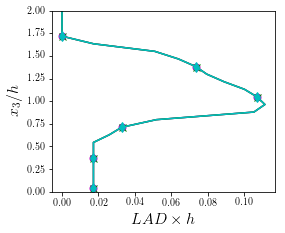

In [115]:
fpath_90 = "/home/ahsan/4rows_angle_0/input/PlantDensity.ini"
lad3d_90 = ld.loadField(fpath_90, inpara_90['Nx'], inpara_90['Ny'], inpara_90['Nz']);
fpath_45 = "/home/ahsan/4rows_angle_45/input/PlantDensity.ini"
lad3d_45 = ld.loadField(fpath_45, inpara_45['Nx'], inpara_45['Ny'], inpara_45['Nz']);
fpath_0 = "/home/ahsan/4rows_angle_90/input/PlantDensity.ini"
lad3d_0 = ld.loadField(fpath_0, inpara_0['Nx'], inpara_0['Ny'], inpara_0['Nz']);
lad_indx = np.nonzero(lad3d_90[:,10,2])
print(lad_indx)
fig = plt.figure();
fig.set_size_inches(fwidth, fheight);
ax = fig.add_subplot(111);
ax.plot(lad3d_90[4,24,:]*inpara_90['h_canopy'],z_u/inpara_90['h_canopy'],  '-om',markevery=4, MarkerSize=7);
ax.plot(lad3d_45[4,24,:]*inpara_45['h_canopy'],z_u/inpara_45['h_canopy'],  '-xg',markevery=4, MarkerSize=7);
ax.plot(lad3d_0[4,24,:]*inpara_0['h_canopy'],z_u/inpara_0['h_canopy'], '-dc',markevery=4, MarkerSize=7);
ax.set_ylim([0, 2]);
ax.set_xlabel(r'$LAD \times h$', fontsize= axl_font_sz);
ax.set_ylabel(r'$x_3/h$', fontsize= axl_font_sz);
plt.box(on=1);
#print(np.nonzero(lad3d_90[4,24,:]))
#print(lad3d_90[4,24,0:19])
#print(z_u[0:19])
LAI = spy.integrate.simps(lad3d_90[4,24,0:19], z_u[0:19]);
print("Leaf area index {0:2.2f}".format(LAI));
displacement_height_90 = spy.integrate.simps(z_u[0:19]* ustar_90[0:19]**2, z_u[0:19])/ \
                         spy.integrate.simps(ustar_90[0:19]**2, z_u[0:19]);
print("Displacement Height, 90 deg: {0:2.2f}".format(displacement_height_90/inpara_90['h_canopy']));
displacement_height_45 = spy.integrate.simps(z_u[0:19]* ustar_45[0:19]**2, z_u[0:19])/ \
                         spy.integrate.simps(ustar_45[0:19]**2, z_u[0:19]);
print("Displacement Height, 45 deg: {0:2.2f}".format(displacement_height_45/inpara_45['h_canopy']));
displacement_height_0 = spy.integrate.simps(z_u[0:19]* ustar_0[0:19]**2, z_u[0:19])/ \
                         spy.integrate.simps(ustar_0[0:19]**2, z_u[0:19]);
print("Displacement Height, 0 Deg: {0:2.2f}".format(displacement_height_45/inpara_45['h_canopy']));

Lead area density profile, corresponding ``LAI=0.08``

``Drag Coefficient = 0.5``

In [90]:
%%latex
Displacement Height = $\frac{\int_0^h x_3u_*^2(x_3)dx_3}{\int_0^h u_*^2(x_3)dx_3}$ 

<IPython.core.display.Latex object>

``For all cases, Raw Displacement Height= 2 m``

``For all cases, Displacement Height/h = 0.92``

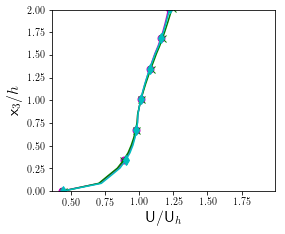

In [116]:
fig = plt.figure();
fig.set_size_inches(fwidth, fheight);
ax = fig.add_subplot(111);
ax.plot(MSpeed_90/MSpeed_90[z_indx_ctop],z_w/inpara_90['h_canopy'], '-om',markevery=4, MarkerSize=7);
ax.plot(MSpeed_45/MSpeed_45[z_indx_ctop],z_w/inpara_45['h_canopy'], '-xg',markevery=4, MarkerSize=7);
ax.plot(MSpeed_0/MSpeed_0[z_indx_ctop],z_w/inpara_0['h_canopy'], '-dc',markevery=4, MarkerSize=7);
#ax.plot([0.0, 1.5],[1.0, 1.0],'-k', alpha=0.2);
ax.set_ylim([0, 2]);
ax.set_xlabel(r'U/U_{h}', fontsize= axl_font_sz);
ax.set_ylabel(r'x_3/h', fontsize= axl_font_sz);
plt.box(on=1);

In [92]:
%%latex
Profile of the mean speed for the three cases. 
Lines marked with symbols $\circ$, $\times$, and $\diamond$ correspond to
cases $M90$, $M45$, and $M00$, respectively.

<IPython.core.display.Latex object>

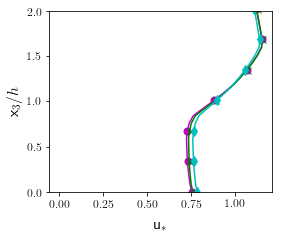

In [117]:
fig = plt.figure();
fig.set_size_inches(fwidth, fheight);
ax = fig.add_subplot(111);
ax.plot(ustar_90,z_w/inpara_90['h_canopy'], '-om',markevery=4, MarkerSize=7);
ax.plot(ustar_45,z_w/inpara_45['h_canopy'], '-xg',markevery=4, MarkerSize=7);
ax.plot(ustar_0,z_w/inpara_0['h_canopy'], '-dc',markevery=4, MarkerSize=7);
#ax.plot([0.0, 1.2],[1.0, 1.0],'-k', alpha=0.2);
ax.set_xlabel(r'u_{*}', fontsize= axl_font_sz);
ax.set_ylabel(r'x_3/h', fontsize= axl_font_sz);
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.set_ylim([0, 2]);
plt.box(on=1);
ax.xaxis.labelpad = 10;

In [94]:
%%latex
Profile of the friction velocity for the three cases. 
Lines marked with symbols $\circ$, $\times$, and $\diamond$ correspond to
cases $M90$, $M45$, and $M00$, respectively.

<IPython.core.display.Latex object>

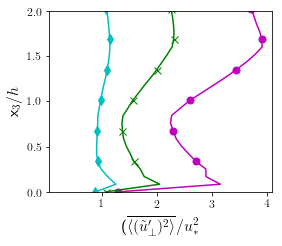

In [118]:
fig = plt.figure();
fig.set_size_inches(fwidth, fheight);
ax = fig.add_subplot(111);
ax.plot((stavg_auu_90)/ustar_90_max**2,z_w/inpara_90['h_canopy'], '-om',markevery=4, MarkerSize=7);
ax.plot((stavg_auu_45)/ustar_45_max**2,z_w/inpara_45['h_canopy'], '-xg',markevery=4, MarkerSize=7);
ax.plot((stavg_auu_0)/ustar_0_max**2,z_w/inpara_0['h_canopy'], '-dc',markevery=4, MarkerSize=7);
ax.set_xlabel(r'(\overline{\langle (\tilde{u}_{\perp}^\prime)^2 \rangle}/u_*^2', fontsize= axl_font_sz);
ax.set_ylabel(r'x_3/h', fontsize= axl_font_sz);
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.set_ylim([0, 2]);
plt.box(on=1);
ax.xaxis.labelpad = 10;

In [96]:
%%latex
Normalized profile of the variance of row-perpendicular velocity-component for the three cases. 
Lines marked with symbols $\circ$, $\times$, and $\diamond$ correspond to
cases $M90$, $M45$, and $M00$, respectively.

<IPython.core.display.Latex object>

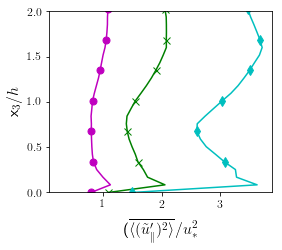

In [109]:
fig = plt.figure();
fig.set_size_inches(fwidth, fheight);
ax = fig.add_subplot(111);
ax.plot((stavg_avv_90)/ustar_90_max**2,z_w/inpara_90['h_canopy'], '-om',markevery=4, MarkerSize=7);
ax.plot((stavg_avv_45)/ustar_45_max**2,z_w/inpara_90['h_canopy'], '-xg',markevery=4, MarkerSize=7);
ax.plot((stavg_avv_0)/ustar_0_max**2,z_w/inpara_0['h_canopy'], '-dc',markevery=4, MarkerSize=7);
ax.set_xlabel(r'(\overline{\langle (\tilde{u}_{\parallel}^\prime)^2 \rangle}/u_*^2', fontsize= axl_font_sz);
ax.set_ylabel(r'x_3/h', fontsize= axl_font_sz);
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.set_ylim([0, 2]);
plt.box(on=1);
ax.xaxis.labelpad = 10;

In [98]:
%%latex
Normalized profile of the variance of row-paralell velocity-component for the three cases. 
Lines marked with symbols $\circ$, $\times$, and $\diamond$ correspond to
cases $M90$, $M45$, and $M00$, respectively.

<IPython.core.display.Latex object>

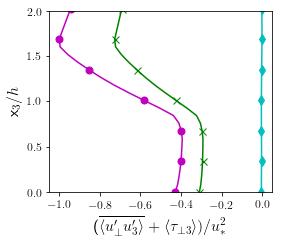

In [110]:
fig = plt.figure();
fig.set_size_inches(fwidth, fheight);
ax = fig.add_subplot(111);
ax.plot((stavg_auw_90+stavg_atxz_90)/ustar_90_max**2,z_w/inpara_90['h_canopy'], '-om',markevery=4, MarkerSize=7);
ax.plot((stavg_auw_45+stavg_atxz_45)/ustar_45_max**2,z_w/inpara_45['h_canopy'], '-xg',markevery=4, MarkerSize=7);
ax.plot((stavg_auw_0+stavg_atxz_0)/ustar_0_max**2,z_w/inpara_0['h_canopy'], '-dc',markevery=4, MarkerSize=7);
#ax.plot([-1.0, 0.25],[1.0, 1.0],'-k', alpha=0.2);
ax.set_xlabel(r'(\overline{\langle u_{\perp}^\prime u_{3}^{\prime} \rangle}+\langle \tau_{\perp 3} \rangle)/u_*^2', fontsize= axl_font_sz);
ax.set_ylabel(r'x_3/h', fontsize= axl_font_sz);
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.set_ylim([0, 2]);
plt.box(on=1);
ax.xaxis.labelpad = 10;

In [100]:
%%latex
Normalized vertical flux of row-perpendicular  momentum for the three cases, $\overline{\langle u_{\perp}^\prime u_{3}^{\prime} \rangle}+\langle \tau_{\perp 3} \rangle = \overline{\langle u_{1}^\prime u_{3}^{\prime} \rangle}+\langle \tau_{13} \rangle$. 
Lines marked with symbols $\circ$, $\times$, and $\diamond$ correspond to
cases $M90$, $M45$, and $M00$, respectively.

<IPython.core.display.Latex object>

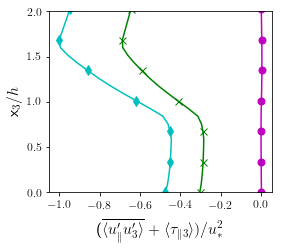

In [111]:
fig = plt.figure();
fig.set_size_inches(fwidth, fheight);
ax = fig.add_subplot(111);
ax.plot((stavg_avw_90+stavg_atyz_90)/ustar_90_max**2,z_w/inpara_90['h_canopy'], '-om',markevery=4, MarkerSize=7);
ax.plot((stavg_avw_45+stavg_atyz_45)/ustar_45_max**2,z_w/inpara_45['h_canopy'], '-xg',markevery=4, MarkerSize=7);
ax.plot((stavg_avw_0+stavg_atyz_0)/ustar_0_max**2,z_w/inpara_0['h_canopy'], '-dc',markevery=4, MarkerSize=7);
#ax.plot([-1.0, 0.25],[1.0, 1.0],'-k', alpha=0.2);
ax.set_xlabel(r'(\overline{\langle u_{\parallel}^\prime u_{3}^{\prime} \rangle}+\langle \tau_{\parallel 3} \rangle)/u_*^2', fontsize= axl_font_sz);
ax.set_ylabel(r'x_3/h', fontsize= axl_font_sz);
ax.set_ylim([0, 2]);
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.xaxis.labelpad = 10;
plt.box(on=1);

In [102]:
%%latex
Normalized vertical flux of row parallel momentum for the three cases, $\overline{\langle u_{\parallel}^\prime u_{3}^{\prime} \rangle}+\langle \tau_{\parallel 3} \rangle = \overline{\langle u_{2}^\prime u_{3}^{\prime} \rangle}+\langle \tau_{23} \rangle$. 
Lines marked with symbols $\circ$, $\times$, and $\diamond$ correspond to
cases $M90$, $M45$, and $M00$, respectively.

<IPython.core.display.Latex object>

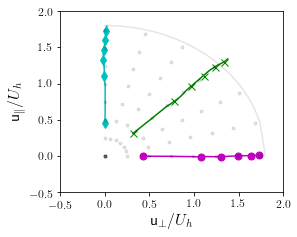

In [103]:
import plot_protractor
speed_90 = np.sqrt(uu_vrow_90**2 + vv_vrow_90**2);
plt.rc('text', usetex=True);
fig = plt.figure();
ax = fig.add_subplot(111)
fig.set_size_inches(fwidth, fheight)
ax.plot(stavg_au_90/MSpeed_90[z_indx_ctop],stavg_av_90/MSpeed_90[z_indx_ctop],'-om',markevery=16, MarkerSize=7);
ax.plot(stavg_au_45/MSpeed_45[z_indx_ctop],stavg_av_45/MSpeed_45[z_indx_ctop],'-xg',markevery=16, MarkerSize=7);
ax.plot(stavg_au_0/MSpeed_0[z_indx_ctop],stavg_av_0/MSpeed_90[z_indx_ctop],'-dc',markevery=16, MarkerSize=7);
plot_protractor.plot_protractor();
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.set_ylim([-0.5, 2.0]);
ax.set_xlim([-0.5, 2.0]);
ax.set_xlabel(r'u_{\perp}/U_h', fontsize= axl_font_sz);
ax.set_ylabel(r'u_{\parallel}/U_h', fontsize= axl_font_sz);
plt.box(on=1);
#fig.savefig('test2png.eps', dpi=100)

In [104]:
%%latex
Hodograph of the three cases. Lines marked with symbols $\circ$, $\times$, and $\diamond$ correspond to
cases $M90$, $M45$, and $M00$, respectively.

<IPython.core.display.Latex object>

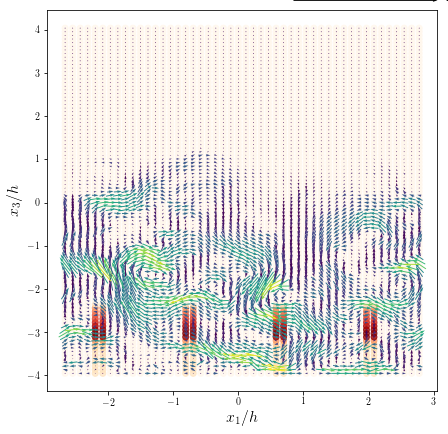

In [105]:
x = np.arange(inpara_0['Nx']);
y = np.arange(inpara_0['Nz']);
x = x - x[23];
y = y - y[47];
x = [i*inpara_0['dx']/inpara_0['h_canopy'] for i in x];
y = [i*inpara_0['dz']/inpara_0['h_canopy'] for i in y] ;

fig = plt.figure();
fig.set_size_inches(7, 7);
ax = fig.add_subplot(111);
ss = inpara_0['h_canopy'];
pevery = 1;
colors = np.sqrt((np.mean(uu_0, axis=1)).T[::pevery,::pevery]**2/ss, \
                np.mean(ww_0, axis=1).T[::pevery,::pevery]**2/ss);
ladprof = np.mean(ladfield, axis=1).T[::pevery,::pevery];

xx, yy = np.meshgrid(x[::pevery], y[::pevery]);
xx = np.reshape(xx, xx.size, order='c');
yy = np.reshape(yy, xx.size, order='c');
ladprof = np.reshape(ladprof/np.max(ladprof), ladprof.size, order='c');
ax.scatter(xx,yy, c=ladprof, cmap=cm.OrRd, marker=r'o', alpha=0.75);

Q = ax.quiver(x[::pevery],y[::pevery],(np.mean(uu_0, axis=1)).T[::pevery,::pevery]/ss, \
          (np.mean(ww_0, axis=1)).T[::pevery,::pevery]/ss, colors, cmap=cm.viridis,\
          scale=0.5, pivot='mid', units='inches');

qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure');
ax.set_xlabel(r'$x_1/h$', fontsize= axl_font_sz);
ax.set_ylabel(r'$x_3/h$', fontsize= axl_font_sz);

In [106]:
%%latex 
Vector of {$u_1^\prime, u_3^\prime$} after averaging in $x_2$ direction for the $M90$ case,
derived from a single snapshot after an elapsed time period of 4 min

<IPython.core.display.Latex object>

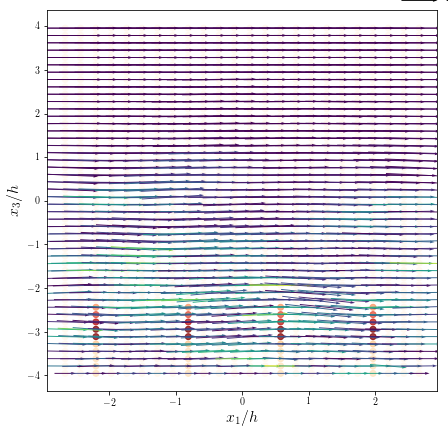

In [107]:
fig = plt.figure();
fig.set_size_inches(7, 7);
ax = fig.add_subplot(111);
ss = inpara_0['h_canopy'];
pevery = 2;
colors = np.sqrt((np.mean(uu_0, axis=1)).T[::pevery,::pevery]**2/ss, \
                np.mean(ww_0, axis=1).T[::pevery,::pevery]**2/ss);
ladprof = np.mean(ladfield, axis=1).T[::pevery,::pevery];

xx, yy = np.meshgrid(x[::pevery], y[::pevery]);
xx = np.reshape(xx, xx.size, order='c');
yy = np.reshape(yy, xx.size, order='c');
ladprof = np.reshape(ladprof/np.max(ladprof), ladprof.size, order='c');
ax.scatter(xx,yy, c=ladprof, cmap=cm.OrRd, marker=r'o', alpha=0.75);

Q = ax.quiver(x[::pevery],y[::pevery],(np.mean(uu_45, axis=1)).T[::pevery,::pevery]/ss, \
          (np.mean(ww_45, axis=1)).T[::pevery,::pevery]/ss, colors, cmap=cm.viridis,\
          scale=2, pivot='mid', units='inches');

qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure');
ax.set_xlabel(r'$x_1/h$', fontsize= axl_font_sz);
ax.set_ylabel(r'$x_3/h$', fontsize= axl_font_sz);

In [108]:
%%latex 
Vector of {$u_1^\prime, u_3^\prime$} after averaging in $x_2$ direction for the $M45$ case, 
derived from a single snapshot after an elapsed time period of 4 min

<IPython.core.display.Latex object>